# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [63]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [61]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 194.4+ KB


In [244]:
#  1. Get the total rides for each city type
pycity_df = pyber_data_df.groupby("type").count()['ride_id']
pycity_df


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [184]:
# 2. Get the total drivers for each city type
pydriver_df = pyber_data_df.groupby("type").sum()
pydriver_df.loc[:, ['driver_count']]


,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


In [185]:
#  3. Get the total amount of fares for each city type
pyfare_df = pyber_data_df.groupby("type").sum()
pyfare_df.loc[:, ['fare']]


,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [186]:
#  4. Get the average fare per ride for each city type. 
pyfareavg_df = pyber_data_df.groupby("type").mean()
pyfareavg_df.loc[:, ['fare']]


,fare
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [187]:
# 5. Get the average fare per driver for each city type. 
pyfare_driver_df = pyber_data_df.groupby('type').mean()
pyfare_driver_df = pyfare_driver_df['fare'] / pyfare_driver_df['driver_count']
pyfare_driver_df


type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [246]:
#  6. Create a PyBer summary DataFrame. 
lis = { 'Types': ['Rural', 'Suburban', 'Urban'],
               'Total_Riders': ['125', '625', '1625'],
               'Total_drivers': ['537', '8570', '59602'],
               'Total_Fare': ['4327.93', '19356.33', '39854.38'],
               'Fare_Per_Rider': ['34.623440', '30.970128', '24.525772'],
               'Fare_per_driver': ['8.059460', '2.258615', '0.668675']}
pyber_s_df = pd.DataFrame(lis)
pyber_s_df

,Types,Total_Riders,Total_drivers,Total_Fare,Fare_Per_Rider,Fare_per_driver
0,Rural,125,537,4327.93,34.623440,8.059460
1,Suburban,625,8570,19356.33,30.970128,2.258615
2,Urban,1625,59602,39854.38,24.525772,0.668675


In [206]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_s_df.index.name = None

In [247]:
#  8. Format the columns.
lis = { 'Types': ['Rural', 'Suburban', 'Urban'],
               'Total_Riders': ['125', '625', '1625'],
               'Total_drivers': ['537', '8570', '59602'],
               'Total_Fare': ['$4,327.93', '$19,356.33', '$39,854.38'],
               'Fare_Per_Rider': ['$34.62', '$30.97', '$24.53'],
               'Fare_per_driver': ['$8.06', '$2.26', '$0.67']}
pyber_s_df = pd.DataFrame(lis)
pyber_s_df

,Types,Total_Riders,Total_drivers,Total_Fare,Fare_Per_Rider,Fare_per_driver
0,Rural,125,537,"$4,327.93",$34.62,$8.06
1,Suburban,625,8570,"$19,356.33",$30.97,$2.26
2,Urban,1625,59602,"$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [222]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [328]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_sp_df = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]
pyber_sp_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [332]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_sp_df = pyber_sp_df.reset_index()
pyber_sp_df.tail(10)

,index,type,date,fare
2365,2365,Urban,2019-05-07 17:27:48,6.39
2366,2366,Urban,2019-05-07 20:05:15,24.20
2367,2367,Urban,2019-05-07 20:22:19,18.74
2368,2368,Urban,2019-05-08 01:54:18,32.69
2369,2369,Urban,2019-05-08 02:31:25,41.33
2370,2370,Urban,2019-05-08 04:20:00,21.99
2371,2371,Urban,2019-05-08 04:39:49,18.45
2372,2372,Urban,2019-05-08 07:29:01,18.55
2373,2373,Urban,2019-05-08 11:38:35,19.77
2374,2374,Urban,2019-05-08 13:10:18,18.04


In [334]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_icv_df = pyber_sp_df.pivot(index='date', columns='type', values='fare')
pyber_icv_df.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [335]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_loc_df = pyber_icv_df.loc['2019-01-01':'2019-04-29' ]
pyber_loc_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [349]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_loc_df.index = pd.to_datetime(pyber_loc_df.index)
pyber_loc_df

type,Rural,Suburban,Urban,date
date,,,,
2019-01-01 00:08:16,NaN,NaN,37.91,2019-01-01 00:08:16
2019-01-01 00:46:46,NaN,47.74,NaN,2019-01-01 00:46:46
2019-01-01 02:07:24,NaN,24.07,NaN,2019-01-01 02:07:24
2019-01-01 03:46:50,NaN,NaN,7.57,2019-01-01 03:46:50
2019-01-01 05:23:21,NaN,NaN,10.75,2019-01-01 05:23:21
...,...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46,2019-04-28 14:28:36
2019-04-28 16:29:16,NaN,NaN,36.42,2019-04-28 16:29:16
2019-04-28 17:26:52,NaN,NaN,31.43,2019-04-28 17:26:52


In [343]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Rural     114 non-null    float64       
 1   Suburban  573 non-null    float64       
 2   Urban     1509 non-null   float64       
 3   date      2196 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 85.8 KB


In [350]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_rs_df = pyber_loc_df.resample('W').sum()
pyber_rs_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


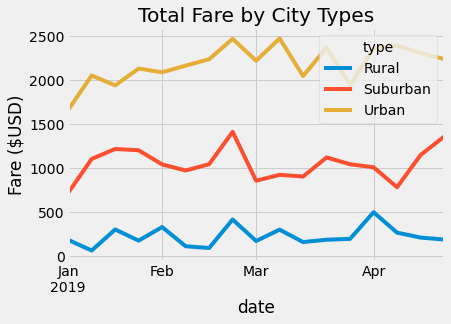

In [358]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pyber_rs_df.plot()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create labels for the X and Y axis
plt.title('Total Fare by City Types')
plt.ylabel("Fare ($USD)")


# Save and display the chart
plt.savefig("PyBer_fare_summary.png")
plt.show()

